In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head() # print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [16]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [17]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
X_train.shape

(8000, 11)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [40]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [50]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8775 - loss: 0.3005 - val_accuracy: 0.8575 - val_loss: 0.3471
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8639 - loss: 0.3285 - val_accuracy: 0.8575 - val_loss: 0.3492
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8667 - loss: 0.3218 - val_accuracy: 0.8556 - val_loss: 0.3465
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3117 - val_accuracy: 0.8537 - val_loss: 0.3453
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8745 - loss: 0.3132 - val_accuracy: 0.8569 - val_loss: 0.3453
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3318 - val_accuracy: 0.8494 - val_loss: 0.3489
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.3110 - val_accuracy: 0.8544 - val_loss: 0.3475
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8697 - loss: 0.3118 - val_accu

In [44]:
model.layers[0].get_weights()

[array([[ 8.79014730e-02,  3.41253132e-01, -1.79091394e-01,
         -2.11393356e-01,  5.50329387e-02,  4.69852448e-01,
          3.92486379e-02,  8.63048956e-02,  1.63124755e-01,
         -1.15997680e-01,  4.49574627e-02],
        [ 7.30218053e-01,  6.24674797e-01,  2.69923687e-01,
          1.14839450e-01, -7.21723199e-01, -2.22001508e-01,
         -3.24993163e-01,  3.14803869e-01,  2.80535817e-02,
          3.38964969e-01, -9.73996222e-01],
        [-2.35977825e-02, -6.81163430e-01, -4.38334681e-02,
          2.06049353e-01,  1.35685146e-01, -3.78590018e-01,
          3.86778235e-01, -2.80093342e-01, -1.32911161e-01,
         -1.36887252e-01, -2.62777716e-01],
        [ 8.59127492e-02, -3.95207047e-01,  4.42387819e-01,
         -1.65484339e-01,  1.28701106e-01, -2.47363257e-03,
         -2.49037102e-01, -2.43358955e-01,  8.19441319e-01,
         -6.79167092e-01, -2.13678822e-01],
        [ 3.48962098e-01, -1.56843320e-01, -1.72840670e-01,
          1.22951722e+00,  2.14430168e-02,  

In [45]:
model.layers[1].get_weights()

[array([[ 7.8562987e-01, -8.0257410e-01,  4.5609024e-01, -3.3615183e-02,
         -5.6191415e-01,  1.4536434e-01,  1.2813242e-01, -5.1476590e-02,
          7.1363226e-02,  5.3281486e-01,  1.7479694e-01],
        [ 3.5082898e-01,  3.4022614e-01,  1.2471352e-01,  4.9414152e-01,
          4.3637884e-01,  3.1664184e-01,  3.5097188e-01, -1.8087775e-01,
          1.2127876e-01,  6.7950040e-01,  1.6864018e-01],
        [-1.5771590e-01,  3.0789778e-01, -3.3113119e-01, -2.4607840e-01,
          2.8321677e-01, -2.8164471e-02,  1.7838149e-01, -4.4811365e-01,
          6.7244999e-02,  5.1838684e-01,  3.2395607e-01],
        [-2.3297855e-01, -2.7288130e-01,  1.5738374e-01,  1.9065835e-01,
          5.7633227e-01,  3.6145872e-01,  3.0187321e-01,  7.4330366e-01,
         -7.2144681e-01,  1.9845439e-01,  3.6628515e-01],
        [ 5.0856757e-01, -3.6772057e-01,  2.6059720e-01, -8.9182740e-01,
         -7.7549589e-01,  3.9103374e-01,  6.5553004e-01, -4.9168295e-01,
         -9.0548262e-02,  9.0015493e-0

In [46]:
model.layers[2].get_weights()

[array([[-0.19695571],
        [ 0.96081805],
        [-0.79776525],
        [ 0.8918076 ],
        [ 0.89645493],
        [ 0.16130185],
        [-1.0581012 ],
        [ 0.9940559 ],
        [-0.54184836],
        [-0.63860637],
        [ 1.0492996 ]], dtype=float32),
 array([-0.22238673], dtype=float32)]

In [47]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [48]:
y_pred = np.where(y_log>0.5,1,0)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.859

In [51]:
import matplotlib.pyplot as plt

In [52]:
history.history

{'accuracy': [0.8682812452316284,
  0.8689062595367432,
  0.8671875,
  0.8682812452316284,
  0.8685937523841858,
  0.8687499761581421,
  0.8701562285423279,
  0.8670312762260437,
  0.8675000071525574,
  0.8675000071525574,
  0.8675000071525574,
  0.8676562309265137,
  0.8700000047683716,
  0.866406261920929,
  0.8692187666893005,
  0.867968738079071,
  0.8678125143051147,
  0.8707812428474426,
  0.8693749904632568,
  0.8695312738418579,
  0.8682812452316284,
  0.8684375286102295,
  0.8681250214576721,
  0.8673437237739563,
  0.8673437237739563,
  0.8676562309265137,
  0.8676562309265137,
  0.8693749904632568,
  0.8684375286102295,
  0.8687499761581421,
  0.8685937523841858,
  0.8682812452316284,
  0.8695312738418579,
  0.8687499761581421,
  0.8693749904632568,
  0.8681250214576721,
  0.8695312738418579,
  0.8685937523841858,
  0.8676562309265137,
  0.8687499761581421,
  0.8701562285423279,
  0.8695312738418579,
  0.8692187666893005,
  0.8685937523841858,
  0.87109375,
  0.8692187666893

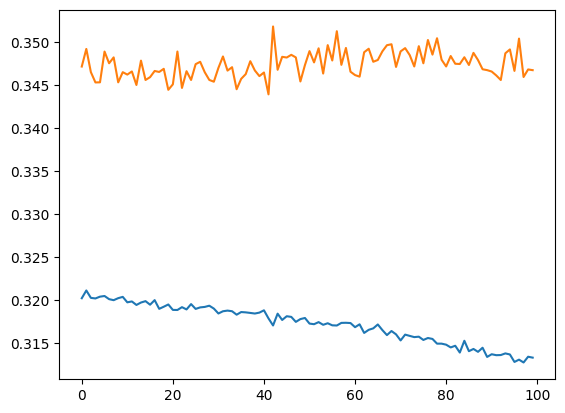

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

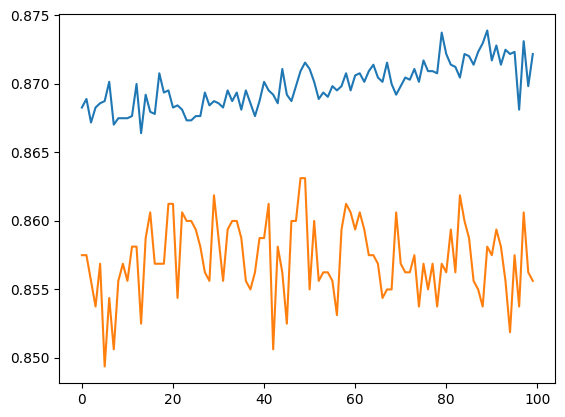

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])